In [132]:
import numpy as np
import pandas as pd 
import plotly.graph_objects as go

# 1. GETTING FAMILIAR WITH THE IBTRACS DATABASE

## 1.1

In [42]:
datas = pd.read_csv('INPUTS/ibtracs.ALL.list.hotel1.csv',low_memory=False,header=1)

In [43]:
datas

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680887,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 12:00:00,NR,-14.0000,165.0000,...,,,,,,,,,2,100
680888,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 15:00:00,NR,-14.3051,165.1850,...,,,,,,,,,8,151
680889,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 18:00:00,NR,-14.7000,165.4000,...,,,,,,,,,6,149
680890,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 21:00:00,NR,-14.8024,165.4930,...,,,,,,,,,1,90


## 1.2

In [44]:
print("Il y'a "+str(np.shape(datas)[0])+" lignes et "+str(np.shape(datas)[1])+" colonnes.")

Il y'a 680892 lignes et 163 colonnes.


## 1.3

In [45]:
datas.describe

<bound method NDFrame.describe of                   SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
0       1842298N11080    1842       1    NI       BB  NOT_NAMED   
1       1842298N11080    1842       1    NI       BB  NOT_NAMED   
2       1842298N11080    1842       1    NI       BB  NOT_NAMED   
3       1842298N11080    1842       1    NI       BB  NOT_NAMED   
4       1842298N11080    1842       1    NI       BB  NOT_NAMED   
...               ...     ...     ...   ...      ...        ...   
680887  2019043S14165    2019       9    SP       MM        OMA   
680888  2019043S14165    2019       9    SP       MM        OMA   
680889  2019043S14165    2019       9    SP       MM        OMA   
680890  2019043S14165    2019       9    SP       MM        OMA   
680891  2019043S14165    2019       9    SP       MM        OMA   

                   ISO_TIME NATURE      LAT       LON  ... BOM_GUST_PER  \
0       1842-10-25 03:00:00     NR  10.9000   80.3000  ...                
1       184

## 1.4

In [47]:
print("Le plus ancien cyclone a été relevé en: "+str(min(datas["SEASON"])))

Le plus ancien cyclone a été relevé en: 1842


## 1.5

In [48]:
datas["NATURE"].value_counts()

TS    479658
NR    158743
ET     26497
DS      6787
MX      6671
SS      2536
Name: NATURE, dtype: int64

Les systèmes tropicales ("TS") sont les plus prédominants.

# 2. ANALYSIS OF TROPICAL SYSTEMS PER BASIN

## 2.1

In [59]:
SID_and_year = datas[["SID","SEASON"]]
moyenne = np.mean(SID_and_year.drop_duplicates(subset="SID",keep="first").value_counts("SEASON"))
print("En moyenne, par année le nombre de cyclone est de: "+str(moyenne))

En moyenne, par année le nombre de cyclone est de: 77.97674418604652


## 2.2

In [131]:
SID_year_basin = datas[["SID","SEASON","BASIN"]]
df = SID_year_basin.fillna(value='NA', inplace=False) #Interprète la valeur NA pour north atlantic comme un nan sinon.
nom_bassin = df['BASIN'].unique()
annee = df['SEASON'].unique()
for x in nom_bassin:
    if type(x) != float: #On évite le bassin ou le nom est un NaN
        tri_par_bassin = df[df['BASIN'] == x]
        moyenne_bassin = sum(tri_par_bassin.drop_duplicates(subset="SID",keep='first').value_counts("SEASON"))/(len(annee))
        print("Pour le bassin "+x+" ,la moyenne est de "+str(moyenne_bassin)+" par année.")
        print('--------------------------------')
        

Pour le bassin NI ,la moyenne est de 10.05813953488372 par année.
--------------------------------
Pour le bassin SI ,la moyenne est de 17.46511627906977 par année.
--------------------------------
Pour le bassin NA ,la moyenne est de 12.924418604651162 par année.
--------------------------------
Pour le bassin EP ,la moyenne est de 9.0 par année.
--------------------------------
Pour le bassin WP ,la moyenne est de 24.575581395348838 par année.
--------------------------------
Pour le bassin SP ,la moyenne est de 7.563953488372093 par année.
--------------------------------
Pour le bassin SA ,la moyenne est de 0.011627906976744186 par année.
--------------------------------


## 2.3

In [173]:
df = datas[["SID","SEASON","BASIN","NATURE"]]
tab = df[df['NATURE']=="TS"].fillna(value='NA', inplace=False)#Interprète la valeur NA pour north atlantic comme un nan sinon.
nom_bassin = tab['BASIN'].unique()
annees = []
nombres_TS = []
for x in nom_bassin:
    tri_par_bassin = tab[tab['BASIN'] == x]
    annee = tri_par_bassin['SEASON'].unique()
    nombre_par_annee = tri_par_bassin.drop_duplicates(subset="SID",keep='first').value_counts("SEASON")
    years = []
    nombres_TS_bassin = []
    for y in annee:
        years.append(y)
        nombres_TS_bassin.append(nombre_par_annee[y])
    annees.append(years)
    nombres_TS.append(nombres_TS_bassin)   

In [198]:
nombres_TS[0]

[15,
 14,
 19,
 12,
 11,
 12,
 13,
 12,
 16,
 16,
 18,
 12,
 14,
 13,
 14,
 12,
 18,
 8,
 15,
 20,
 17,
 10,
 10,
 12,
 9,
 15,
 13,
 24,
 18,
 19,
 19,
 12,
 10,
 8,
 13,
 16,
 33,
 17,
 17,
 7,
 18,
 15,
 21,
 11,
 15,
 11,
 9,
 17,
 10,
 7,
 13,
 5,
 10,
 6,
 5,
 11,
 5,
 10,
 12,
 5,
 6,
 7,
 6,
 1,
 6,
 15,
 4,
 6,
 5,
 5,
 7,
 5,
 9,
 11,
 4,
 11,
 8,
 6,
 5,
 3,
 13,
 15,
 20,
 13,
 8,
 17,
 11,
 9,
 6,
 9,
 6,
 11,
 10,
 14,
 11,
 7,
 10,
 10,
 16,
 16,
 12,
 11,
 14,
 16,
 13,
 12,
 8,
 12,
 14,
 8,
 12,
 5,
 9,
 12,
 6,
 11,
 26,
 14,
 28,
 19,
 22,
 16,
 16,
 17,
 22,
 19,
 15,
 23,
 19,
 18,
 21,
 7,
 6,
 19,
 14,
 10,
 14,
 19,
 15,
 16,
 12,
 9,
 10,
 12,
 21,
 13,
 8,
 14,
 16,
 18,
 17,
 14,
 21,
 15,
 29,
 10,
 16,
 17,
 11,
 21,
 20,
 19,
 14,
 9,
 12,
 16,
 18,
 4]

In [181]:
annees[0]

[1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,

In [183]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=nombres_TS[0], x=annees[0], name="count"))

"""fig.add_trace(go.Histogram(
    x=np.random.randint(7, size=20),
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    bargap=0.1)"""

fig.show()

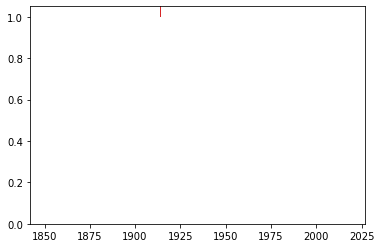